# Notebook test pour l'utilisation de Tesseract OCR (Optical Character Recognition) de Google. 

- Tesseract OCR lien : https://github.com/tesseract-ocr/tesseract
- Python Tesseract Wrapper : https://github.com/madmaze/pytesseract

Note : Pytesseract dépend de Pillow qui fonctionne en RGB donc après l'extraction, pas besoin de reconvertir l'image en RGB

Prérequis:
- Installer Tesseract OCR via les executables de [UB Manheim](https://github.com/UB-Mannheim/tesseract/wiki)
- Installer le wrapper Pytesseract pour utiliser les fonctions en Python (ok with conda install)

Pour commencer : [PyImageSearch](https://www.pyimagesearch.com/2020/05/25/tesseract-ocr-text-localization-and-detection/)

https://www.youtube.com/watch?v=AAPZLK41rek

In [1]:
import pytesseract as pyt
from PIL import Image
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [2]:
path = os.getcwd()
print(path)

C:\Users\VArri\Documents\GitHub\OCR


In [3]:
# im = Image.open("licenseplatefr.jpg")
# im = cv2.imread("licenseplate2.jpg")
im = cv2.imread("lr4.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

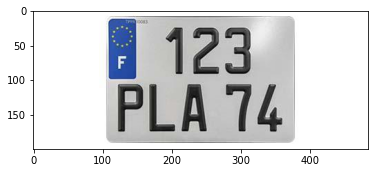

In [4]:
plt.imshow(im)
plt.show()

In [7]:
results = pyt.image_to_data(im, output_type=pyt.Output.DICT)

In [8]:
results

{'level': [1, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1],
 'left': [0, 105, 105, 105, 105],
 'top': [0, 0, 0, 0, 0],
 'width': [485, 278, 278, 278, 278],
 'height': [200, 191, 191, 191, 191],
 'conf': ['-1', '-1', '-1', '-1', '95.000000'],
 'text': ['', '', '', '', '']}

In [9]:
results_pd = pd.DataFrame.from_dict(results)
results_pd

# for visibility

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,485,200,-1,
1,2,1,1,0,0,0,105,0,278,191,-1,
2,3,1,1,1,0,0,105,0,278,191,-1,
3,4,1,1,1,1,0,105,0,278,191,-1,
4,5,1,1,1,1,1,105,0,278,191,95.000000,


In [7]:
results_pd["text"][:]

0    
1    
2    
3    
4    
Name: text, dtype: object

In [9]:
i=4

start_point = (results_pd["left"].iloc[i], results_pd["top"].iloc[i])
end_point = (results_pd["left"].iloc[i] + results_pd["width"].iloc[i], results_pd["top"].iloc[i] + results_pd["height"].iloc[i])
color = (255,0,0)
thickness = 3
img = cv2.rectangle(im, start_point, end_point, color, thickness)

In [10]:
results_pd["text"].iloc[i]

''

In [11]:
im.size

291000

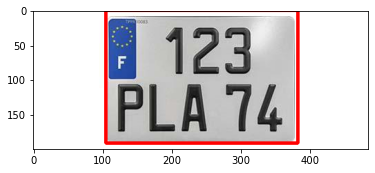

In [12]:
plt.imshow(im)
plt.show()